# Heart Disease Diagnostic Analysis

# INDRODUCTION

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on
all irrespective of any status. You are required to analyze this health and medical data for
better future preparation.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
# Read the File
df=pd.read_csv('processed_cleveland.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num  
0        3  0    6    0  
1        2  3    3    2  
2        2  2    7    1  
3        3  0    3    0  
4        1  0    3    0  
..     ... ..  ...  ...  
298      2  0    7    1  
299      2  2    7    2  
300      2  1    7    3  
301      2  1    3    1  
302      1  ?    3    0  

[303 rows x 14 columns]

In [3]:
# Show all the Columns presnt in the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# There are Fourteen Features in this dataset

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the
hospital)

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
Value 1: upsloping
Value 2: flat
Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy (for calcification of vessels)

thal: results of nuclear stress test (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease 
Value 0: NO
Value 1: Yes

In [4]:
#find the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# There is no missing value .

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

In [6]:
df.groupby('num').size()

num
0    164
1     55
2     36
3     35
4     13
dtype: int64

In [7]:
#Changing the variable
df['num']=df['num'].replace([2,3,4],1)

In [8]:
df.groupby('num').size()

num
0    164
1    139
dtype: int64

In [9]:
#Converting numberical variable into categorical
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [10]:
df['heart_disease'] = df['num'].apply(heart_disease)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  
0  0    6    0       Absence  
1  3    3    1      Presence  
2  2    7    1      Presence  
3  0    3    0       Absence  
4  0    3    0       Absence

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'heart_disease'],
      dtype='object')

In [12]:
heart_name=df.heart_disease.value_counts().index
heart_name

Index(['Absence', 'Presence'], dtype='object')

In [13]:
heart_Val=df.heart_disease.value_counts().values
heart_Val

array([164, 139], dtype=int64)

Text(0.5, 1.0, 'Heart Disease in Population')

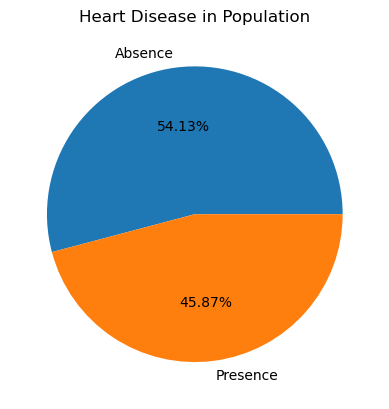

In [14]:
#Creating Pie chart proportion of patients with and without heart disease 
plt.pie(heart_Val,labels=heart_name,autopct='%1.2f%%')
plt.title('Heart Disease in Population')

The People having Heart Disease Absence are 54.13%.
The People Having Heart Disease Presence are 45.87%.

In [15]:
#Coverting the numercial Variable into Catogerical
def Gender(row):
    if row==0:
        return 'Female'
    elif row==1:
        return 'Male'

In [16]:
df['Gender'] = df['sex'].apply(Gender)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender  
0  0    6    0       Absence    Male  
1  3    3    1      Presence    Male  
2  2    7    1      Presence    Male  
3  0    3    0       Absence    Male  
4  0    3    0       Absence  Female

In [17]:
Gender_name=df.Gender.value_counts().index
Gender_name

Index(['Male', 'Female'], dtype='object')

In [18]:
Gender_val=df.Gender.value_counts().values
Gender_val

array([206,  97], dtype=int64)

Text(0.5, 1.0, 'Gender Proportion of Population')

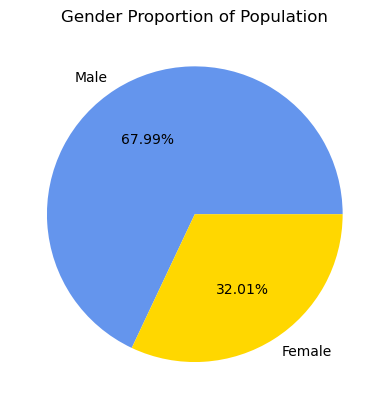

In [19]:
#Creating Pie chart gender propertion of the Patients
plt.pie(Gender_val,labels=Gender_name,autopct='%1.2f%%',colors=[ 'cornflowerblue', 'gold', 'orchid', 'green',  "#77BFE2"])
plt.title('Gender Proportion of Population')


The number of the Male  are 67.99%.
The number of the Female  are 32.01%.

In [20]:
#Coverting the numercial Variable into Catogerical
def Chest_Pain(row):
    if row==1:
        return 'typical angina'
    if row==2:
        return 'atypical angina'
    if row==3:
        return 'non-anginal'
    elif row==4:
        return 'asymptomatic'

In [21]:
df['Chest_Pain'] = df['cp'].apply(Chest_Pain)
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num heart_disease  Gender       Chest_Pain  
298      2  0    7    1      Presence    Male   typical angina  
299      2  2    7    1      Presence    Male     asymptomatic  
300      2  1    7    1      Presence    Male     asymptomatic  
301      2  1    3    1      Presence  Female  atypical angina  
302      1  ?    3    0       Absence    Male      non-anginal

In [22]:
Chest_name=df.Chest_Pain.value_counts().index
Chest_name

Index(['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina'], dtype='object')

In [23]:
Chest_val=df.Chest_Pain.value_counts().values
Chest_val

array([144,  86,  50,  23], dtype=int64)

Text(0.5, 1.0, 'Chest Pain in Population')

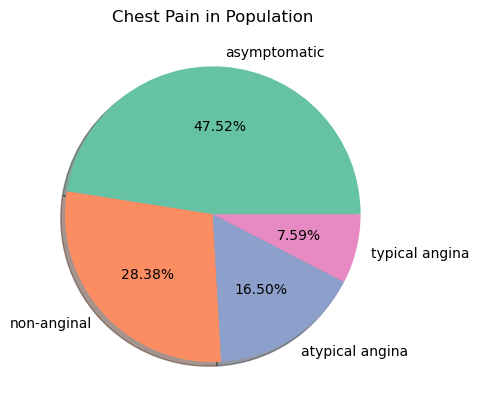

In [24]:
#Creating Pie chart proportion of chest pain in patient
plt.pie(Chest_val,labels=Chest_name,autopct='%1.2f%%',colors=sns.color_palette('Set2'),shadow=True)
plt.title('Chest Pain in Population')

We have asymptomatic individual of 47.52% does not show any signs of illness or experience any noticeable symptoms associated with a Chest pain.
We Have non-angina individual of 28.38% chest pain in people without heart disease.
we have atypical angina of 16.50%  chest pain caused by reduced blood flow to the heart muscle due to narrowed or blocked coronary arteries.
we have typical angina of  7.59% pain is usually described as a tightness, pressure, squeezing, or burning sensation in the chest.

In [25]:
#Coverting the numercial Variable into Catogerical
def Fasting_blood_sugar(row):
    if row==0:
        return 'False'
    elif row==1:
        return 'True'

In [26]:
df['Fasting_blood_sugar']=df['fbs'].apply(Fasting_blood_sugar)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  
0  0    6    0       Absence    Male   typical angina                True  
1  3    3    1      Presence    Male     asymptomatic               False  
2  2    7    1      Presence    Male     asymptomatic               False  
3  0    3    0       Absence    Male      non-anginal               False  
4  0    3    0       Absence  Female  atypical angina               False

In [27]:
fbs_name=df.Fasting_blood_sugar.value_counts().index
fbs_name

Index(['False', 'True'], dtype='object')

In [28]:
fbs_val=df.Fasting_blood_sugar.value_counts().values
fbs_val

array([258,  45], dtype=int64)

Text(0.5, 1.0, 'People with Fasting blood sugar')

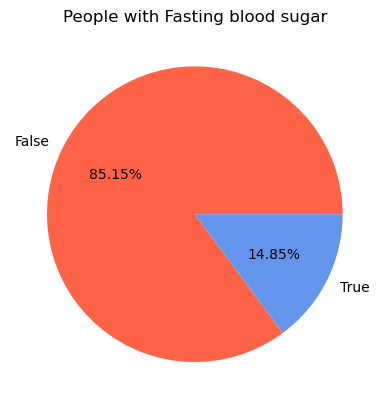

In [29]:
#Creating Pie chart proportion of patients with Fasting blood Sugar
plt.pie(fbs_val,labels=fbs_name,autopct='%1.2f%%',colors=['tomato', 'cornflowerblue', 'gold', 'orchid', 'green',  "#77BFE2"])
plt.title('People with Fasting blood sugar')

The people with not fasting blood sugar are 85.15% they do not have Fasting blood sugar which is less than 120 mg/dl
The people are fasting with blood sugar are 14.85%. which is greater than 120 mg/dl blood sugar levels is crucial as high blood sugar can contribute to inflammation, endothelial dysfunction, and an increased risk of cardiovascular events. 

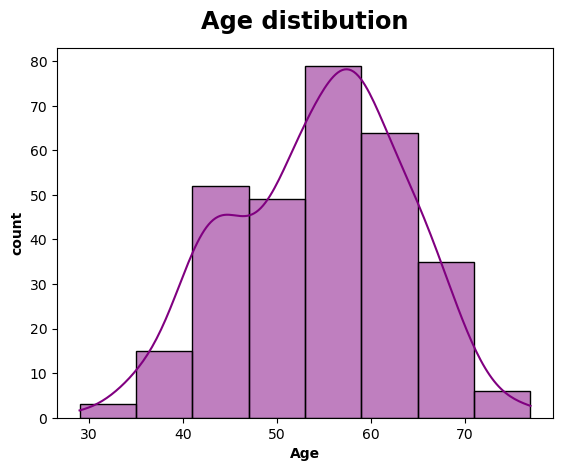

In [30]:
# Age dirtribution in heart disease
Age_dis=sns.histplot(data=df ,x='age',bins=8,kde=True,color='purple')
Age_dis.set_xlabel('Age',fontweight='bold')
Age_dis.set_ylabel('count',fontweight='bold')
Age_dis.set_title('Age distibution',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

 The potential age groups of 51-65 that are more prone to heart disease.

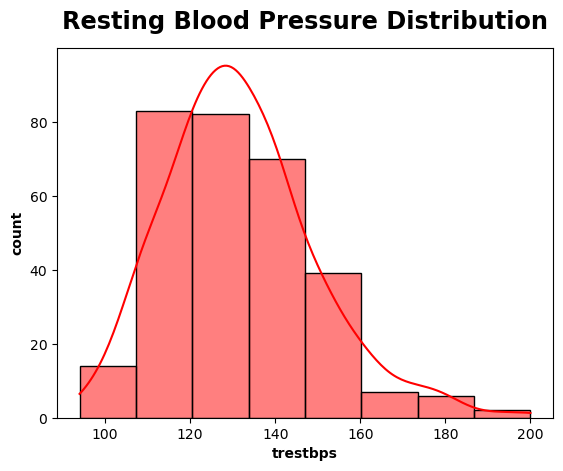

In [31]:
#Resting blood pressure Distribution
res_dis=sns.histplot(data=df ,x='trestbps',bins=8,kde=True,color='red')
res_dis.set_xlabel('trestbps',fontweight='bold')
res_dis.set_ylabel('count',fontweight='bold')
res_dis.set_title('Resting Blood Pressure Distribution',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

The Resting blood pressure in heart disease more likely 110-140 mm hg 

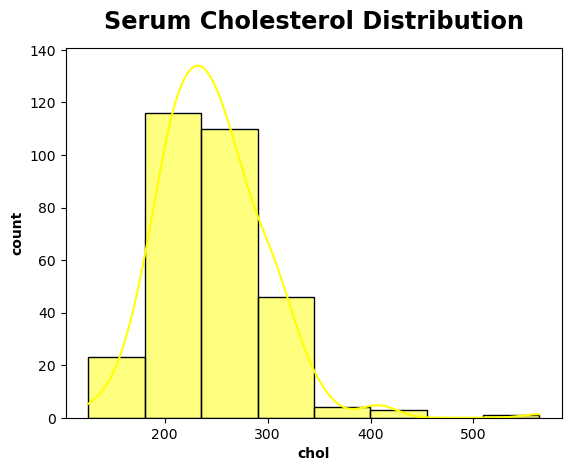

In [32]:
# Serum Cholesterol Distribution
ser_dis=sns.histplot(data=df ,x='chol',bins=8,kde=True,color='yellow')
ser_dis.set_xlabel('chol',fontweight='bold')
ser_dis.set_ylabel('count',fontweight='bold')
ser_dis.set_title('Serum Cholesterol Distribution',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

The serum Cholesterol  in heart disease more likely 200-300 mg/dl

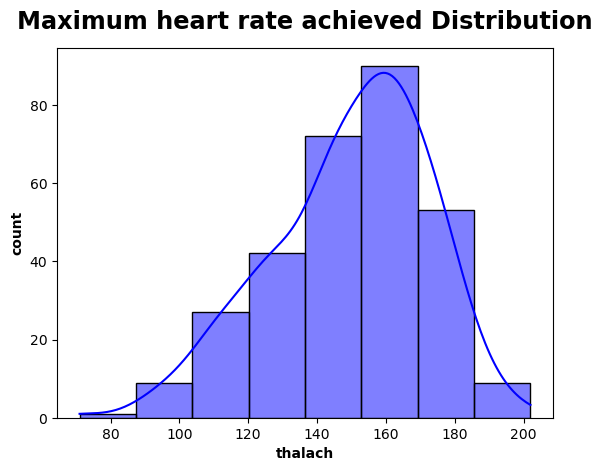

In [33]:
# maximum heart rate achieved distribution
ser_dis=sns.histplot(data=df ,x='thalach',bins=8,kde=True,color='blue')
ser_dis.set_xlabel('thalach',fontweight='bold')
ser_dis.set_ylabel('count',fontweight='bold')
ser_dis.set_title('Maximum heart rate achieved Distribution',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

The maximum Heart rate achieved in heart disease is 140-180

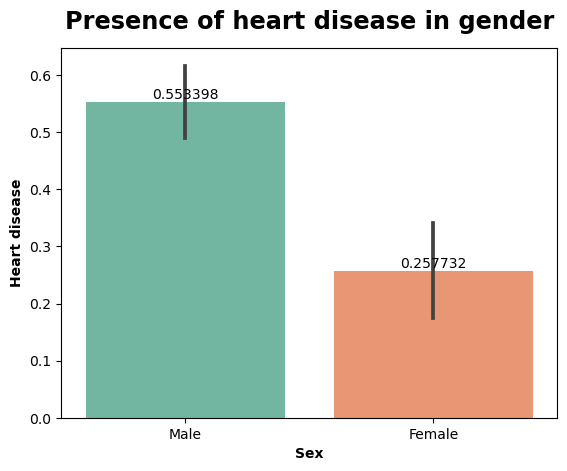

In [34]:
# Barplot in Presence of heart disease in gender
Presence=sns.barplot(data=df ,x='Gender',y='num',palette="Set2")
Presence.set_xlabel('Sex',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('Presence of heart disease in gender',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

We can see that Male has high prone to heart disease .

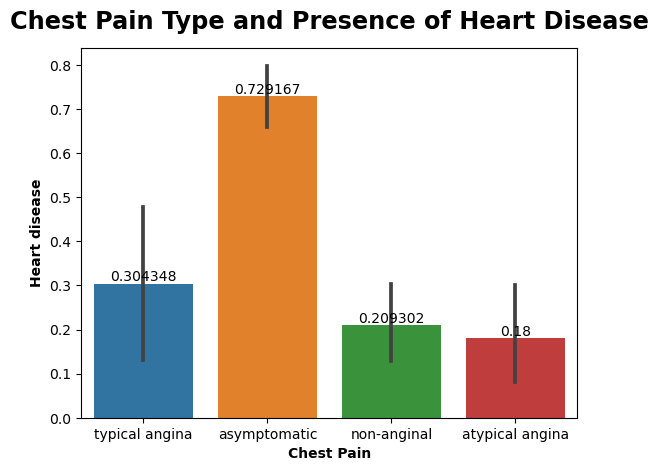

In [35]:
#Bar plot of Chest Pain Type and Presence of Heart Disease
Presence=sns.barplot(data=df ,x='Chest_Pain',y='num')
Presence.set_xlabel('Chest Pain',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('Chest Pain Type and Presence of Heart Disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The asymptomatic type of the chest pain is highly present in heart disease

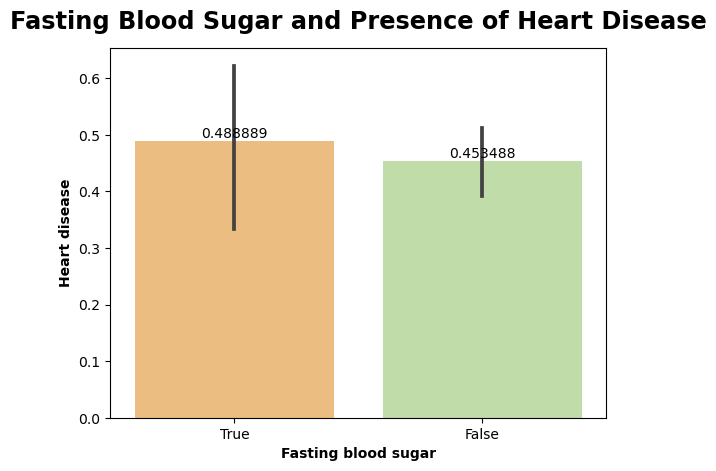

In [36]:
#Bar plot of Fasting Blood Sugar and Presence of Heart Disease
Presence=sns.barplot(data=df ,x='Fasting_blood_sugar',y='num',palette="Spectral")
Presence.set_xlabel('Fasting blood sugar',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('Fasting Blood Sugar and Presence of Heart Disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The Fasting blood sugar is more high in heart Disease .

In [37]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  
0  0    6    0       Absence    Male   typical angina                True  
1  3    3    1      Presence    Male     asymptomatic               False  
2  2    7    1      Presence    Male     asymptomatic               False  
3  0    3    0       Absence    Male      non-anginal               False  
4  0    3    0       Absence  Female  atypical angina               False

In [38]:
df['thal']=df['thal'].replace("?",'7')

In [39]:
def Thal_mai(number):
    replacements = {'3': 'normal', '6': 'fixed defect', '7': 'reversible defect'}
    if number in replacements:
        return replacements[number]
    else:
        return number 

In [40]:
df['Thal_mai']=df['thal'].apply(Thal_mai)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
0  0    6    0       Absence    Male   typical angina                True   
1  3    3    1      Presence    Male     asymptomatic               False   
2  2    7    1      Presence    Male     asymptomatic               False   
3  0    3    0       Absence    Male      non-anginal               False   
4  0    3    0       Absence  Female  atypical angina               False   

            Thal_mai  
0       fixed defect  
1             normal  
2  reversible defect  
3             normal  
4             normal

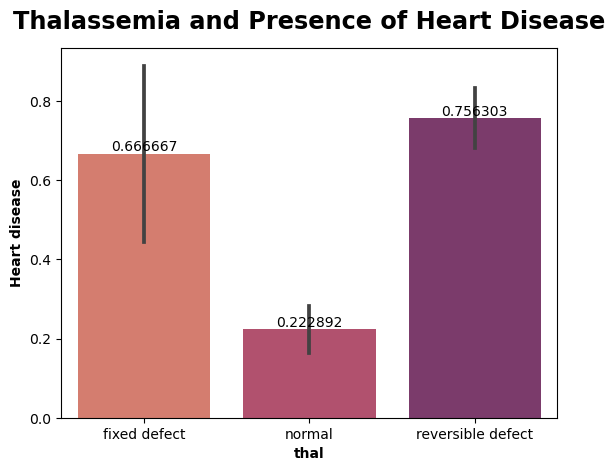

In [41]:
#Bar plot of Thalassemia and Presence of Heart Disease
Presence=sns.barplot(data=df ,x='Thal_mai',y='num',palette="flare")
Presence.set_xlabel('thal',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('Thalassemia and Presence of Heart Disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The Thalassemia and Presence of Heart Disease is more high in reversible defect

In [42]:
# Calculate the correlation matrix
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_matrix = df[numerical_columns].corr()
correlation_matrix.style.background_gradient(cmap='summer')

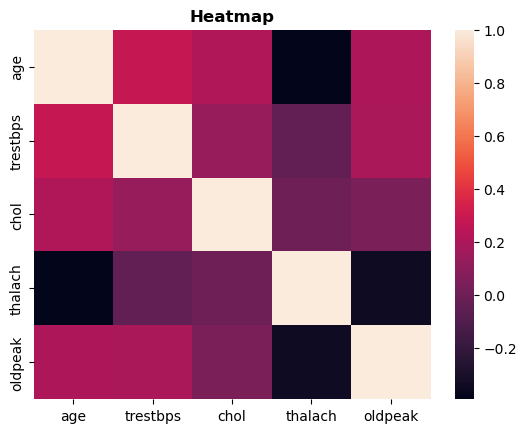

In [43]:
#Heatmap corelation between feature

heat=sns.heatmap(data=correlation_matrix)
heat.set_title('Heatmap',fontweight='bold')  
plt.show()

Age and Maximum Heart Rate (thalach): There is a negative correlation (-0.39) between age and maximum heart rate achieved (thalach). As age increases, the maximum heart rate achieved tends to decrease.

Age and Resting Blood Pressure (trestbps): There is a positive correlation (0.28) between age and resting blood pressure (trestbps). As age increases, the resting blood pressure tends to be higher.

Age and Serum Cholesterol Level (chol): There is a positive correlation (0.21) between age and serum cholesterol level (chol). As age increases, the serum cholesterol level tends to be higher.

Maximum Heart Rate (thalach) and Oldpeak: There is a negative correlation (-0.34) between maximum heart rate achieved (thalach) and the ST depression induced by exercise relative to rest (oldpeak). As the maximum heart rate achieved increases, the ST depression tends to decrease.

In [44]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
0  0    6    0       Absence    Male   typical angina                True   
1  3    3    1      Presence    Male     asymptomatic               False   
2  2    7    1      Presence    Male     asymptomatic               False   
3  0    3    0       Absence    Male      non-anginal               False   
4  0    3    0       Absence  Female  atypical angina               False   

            Thal_mai  
0       fixed defect  
1             normal  
2  reversible defect  
3             normal  
4             normal

In [45]:
plot_data = df.groupby(['age', 'Chest_Pain', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num','Gender'], as_index=False).sex.sum()

fig = px.line(plot_data, x='age', y='Gender', color='Chest_Pain')
fig.update_layout(
    title_text='Heart Disease Risk Factors',
    height=500, width=1000)
fig.show()

The Youngest age is 29 male with the chest Pain type atypical angina.
The oldest age is 77 male with the chest pain type asymptomatic.

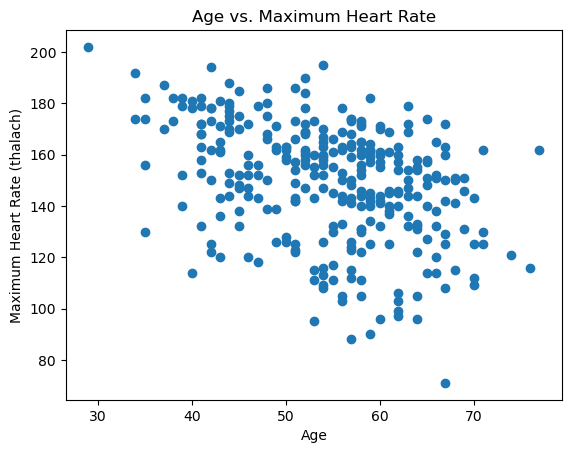

In [46]:
# Scatter plot Age vs. Maximum Heart Rate (thalach)
x = df['age']  
y = df['thalach']  
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Age vs. Maximum Heart Rate')
plt.show()

The lowest heart rate is 80-100 in the Age range of 55-70 
The highest heart rateis 160-200 in the Age range of 30-45

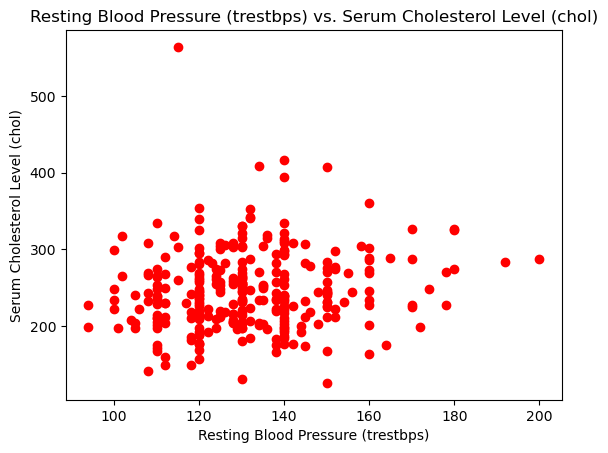

In [47]:
#  Scatterplot Resting Blood Pressure (trestbps) vs. Serum Cholesterol Level (chol)
x = df['trestbps']  
y = df['chol']  
plt.scatter(x, y,color='red')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Serum Cholesterol Level (chol)')
plt.title('Resting Blood Pressure (trestbps) vs. Serum Cholesterol Level (chol)')
plt.show()

The highest cholersterrol level between 500-600 mg/dl with the Resting blood Pressure between 100-120 mm hg
The lowest cholersterrol level between 100-200 mg/dl with the Resting blood Pressure between 100-160 mm hg

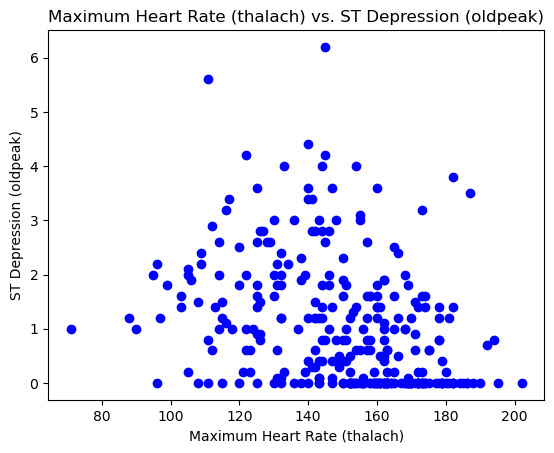

In [48]:
# Scatterplot Maximum Heart Rate (thalach) vs. ST Depression (oldpeak)
x = df['thalach']  
y = df['oldpeak']  
plt.scatter(x, y,color='blue')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('ST Depression (oldpeak)')
plt.title('Maximum Heart Rate (thalach) vs. ST Depression (oldpeak)')
plt.show()

The ST depression is 0 with the maximum heart rate of 100-200
The ST depression is 5-6 with the maximum heart rate of 100-160

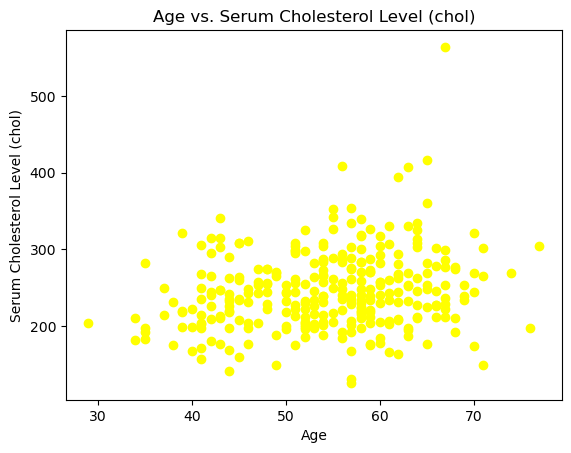

In [49]:
#Scatter plot Age vs. Serum Cholesterol Level (chol)
x = df['age']  
y = df['chol']  
plt.scatter(x, y,color='yellow')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol Level (chol)')
plt.title('Age vs. Serum Cholesterol Level (chol)')
plt.show()

The sernum cholestrol level is high 300-500 mg/dl in the age range of 50-70
The sernum cholestrol level is low 100-200 mg/dl in the age range of 40-70

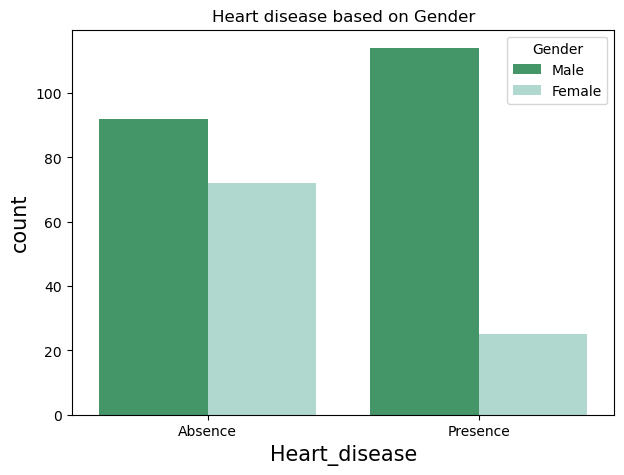

In [50]:
# Count plot Based on heart disease in Gender
plt.figure(figsize=(7,5))
sns.countplot(x=df['heart_disease'],hue='Gender',data=df,palette='BuGn_r')
plt.xlabel('Heart_disease',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Heart disease based on Gender')
plt.show()

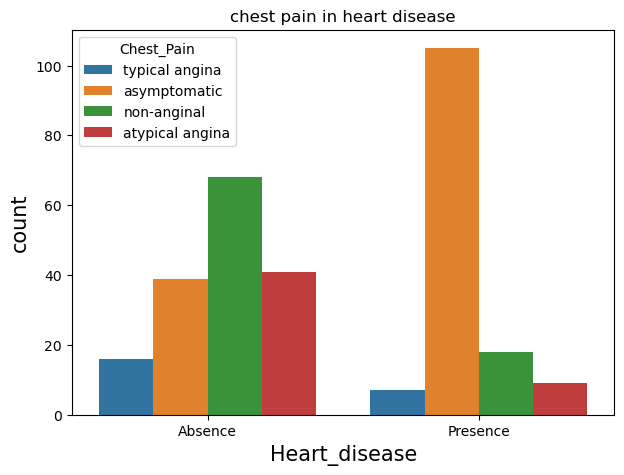

In [51]:
# Count plot Based on chest pain in heart disease 
plt.figure(figsize=(7,5))
sns.countplot(x=df['heart_disease'],hue='Chest_Pain',data=df)
plt.xlabel('Heart_disease',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('chest pain in heart disease')
plt.show()

The chest pain experience in the heart disease is more likly asymptomatic.
Asymptomatic means there are no symptoms. You are considered asymptomatic if you: Have recovered from an illness or condition and no longer have symptoms of that illness or condition. 

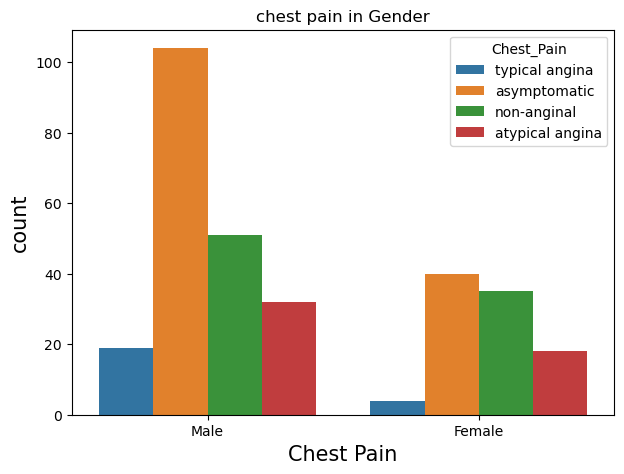

In [52]:
# Count plot Based on chest pain in gender
plt.figure(figsize=(7,5))
sns.countplot(x=df['Gender'],hue='Chest_Pain',data=df)
plt.xlabel('Chest Pain',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('chest pain in Gender')
plt.show()

The asymptomatic chest pain is occurs mostly in male.

In [53]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
0  0    6    0       Absence    Male   typical angina                True   
1  3    3    1      Presence    Male     asymptomatic               False   
2  2    7    1      Presence    Male     asymptomatic               False   
3  0    3    0       Absence    Male      non-anginal               False   
4  0    3    0       Absence  Female  atypical angina               False   

            Thal_mai  
0       fixed defect  
1             normal  
2  reversible defect  
3             normal  
4             normal

In [54]:
#converting numercial variable into catogerical 
def angina(row):
    if row==1:
        return 'yes'
    elif row==0:
        return 'no'

In [55]:
df['angina']=df['exang'].apply(angina)
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num heart_disease  Gender       Chest_Pain  \
298      2  0    7    1      Presence    Male   typical angina   
299      2  2    7    1      Presence    Male     asymptomatic   
300      2  1    7    1      Presence    Male     asymptomatic   
301      2  1    3    1      Presence  Female  atypical angina   
302      1  ?    3    0       Absence    Male      non-anginal   

    Fasting_blood_sugar           Thal_mai angina  
298               False  reversible defect     no  
299                True  reversible defect     no  
300               False  reversible defect    yes  
301               False             normal     no  
302               False             normal     no

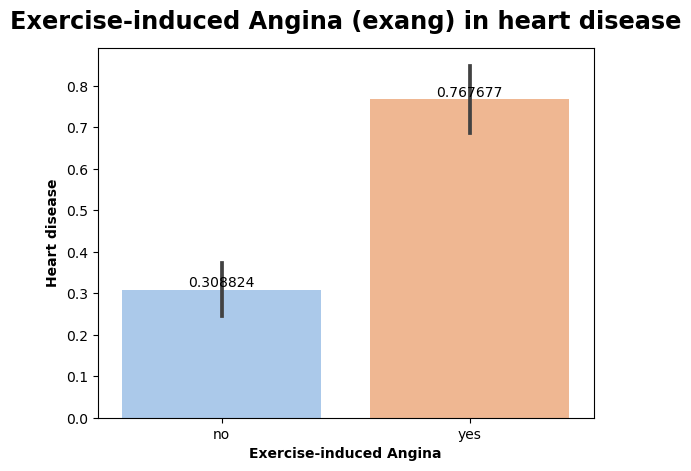

In [56]:
# barplot based on Exercise-induced Angina (exang) in heart disease :
Presence=sns.barplot(data=df ,x='angina',y='num',palette='pastel')
Presence.set_xlabel('Exercise-induced Angina',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('Exercise-induced Angina (exang) in heart disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

exang is the exercise induced angina which record pain and no pain when there is a heart disease 
That translates into chest pain or tightness — called angina — when those patients exercise or experience emotional stress, because their body is trying to pump more blood, but can't do so effectively through such a restricted space. When patients rest, though, the pain goes away.

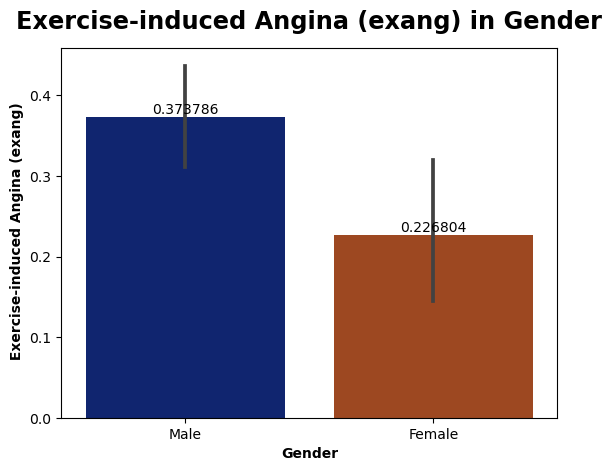

In [57]:
# Barplot in Exercise-induced Angina (exang) in Gender

Presence=sns.barplot(data=df ,x='Gender',y='exang',palette='dark')
Presence.set_xlabel('Gender',fontweight='bold')
Presence.set_ylabel(' Exercise-induced Angina (exang)',fontweight='bold')
Presence.set_title('Exercise-induced Angina (exang) in Gender',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The exercise induced angina is high in male that least when those patients exercise or experience emotional stress.

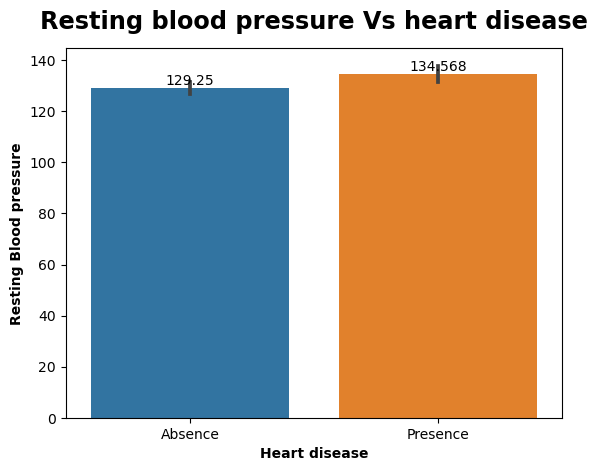

In [58]:
# barplot on resting blood pressure Vs heart disease
Presence=sns.barplot(data=df ,x='heart_disease',y='trestbps')
Presence.set_xlabel('Heart disease',fontweight='bold')
Presence.set_ylabel('Resting Blood pressure',fontweight='bold')
Presence.set_title('Resting blood pressure Vs heart disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The blood pressure is more high in heart disease.

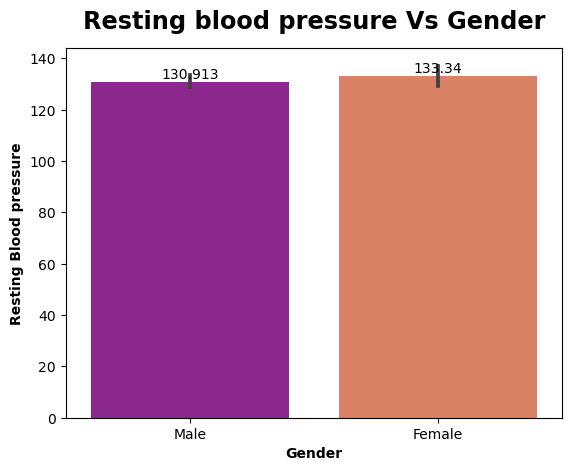

In [59]:
# barplot on resting blood pressure Vs Gender
Presence=sns.barplot(data=df ,x='Gender',y='trestbps',palette='plasma')
Presence.set_xlabel('Gender',fontweight='bold')
Presence.set_ylabel('Resting Blood pressure',fontweight='bold')
Presence.set_title('Resting blood pressure Vs Gender',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

The blood pressure is most equal in male and female.

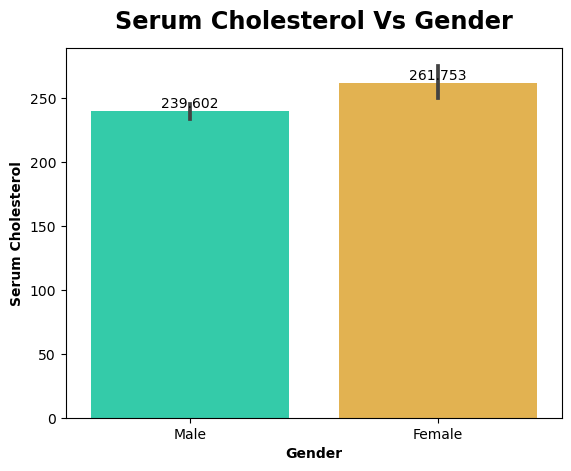

In [60]:
# barplot on Serum Cholesterol Vs Gender
Presence=sns.barplot(data=df ,x='Gender',y='chol',palette='turbo')
Presence.set_xlabel('Gender',fontweight='bold')
Presence.set_ylabel('Serum Cholesterol',fontweight='bold')
Presence.set_title('Serum Cholesterol Vs Gender',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])

plt.show()

The cholesterol level is high in female as compared to male 

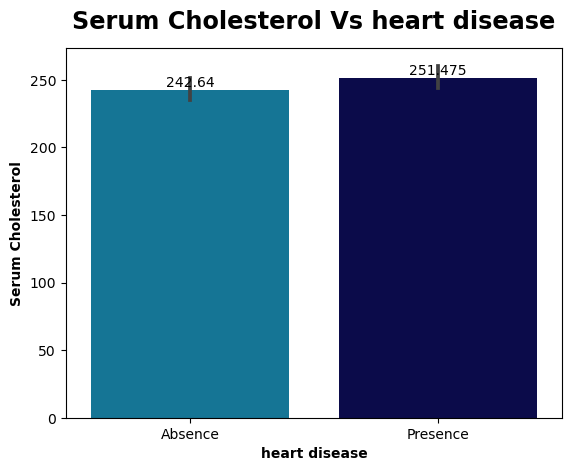

In [61]:
# barplot on Serum Cholesterol Vs heart disease 
Presence=sns.barplot(data=df ,x='heart_disease',y='chol',palette='ocean_r')
Presence.set_xlabel('heart disease',fontweight='bold')
Presence.set_ylabel('Serum Cholesterol',fontweight='bold')
Presence.set_title('Serum Cholesterol Vs heart disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

The Cholesterol is highly risk factor which can lead to heart disease.

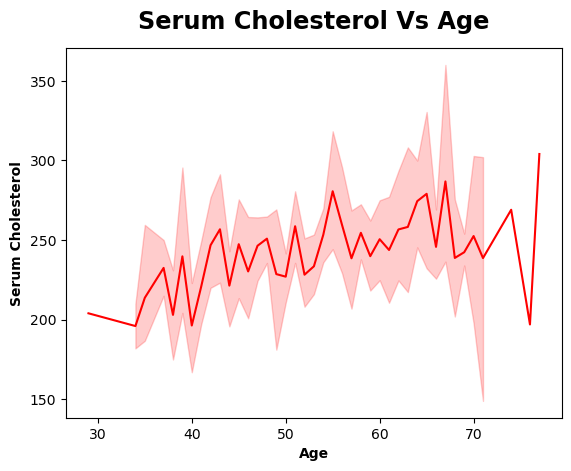

In [62]:
# lineplot on Serum Cholesterol Vs Age
Presence=sns.lineplot(data=df ,x='age',y='chol',color='r')
Presence.set_xlabel('Age',fontweight='bold')
Presence.set_ylabel('Serum Cholesterol',fontweight='bold')
Presence.set_title('Serum Cholesterol Vs Age',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

The cholesterol level is  increase at the age of 50-60 and then continue the same pattern

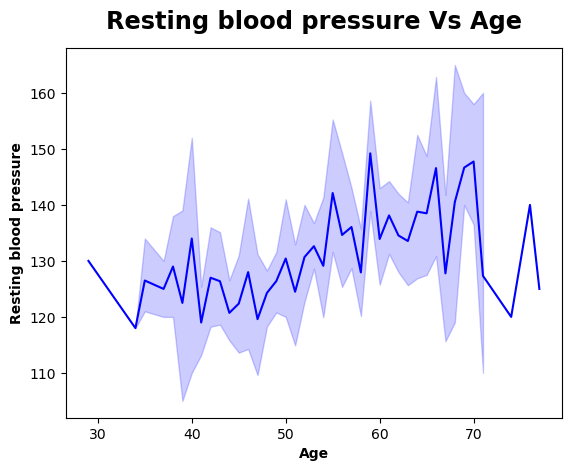

In [63]:
# lineplot on Resting blood pressure Vs Age
Presence=sns.lineplot(data=df ,x='age',y='trestbps',color='b')
Presence.set_xlabel('Age',fontweight='bold')
Presence.set_ylabel('Resting blood pressure',fontweight='bold')
Presence.set_title('Resting blood pressure Vs Age',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

The blood pressure is increase at the age of 50-65 and then continue the same pattern.

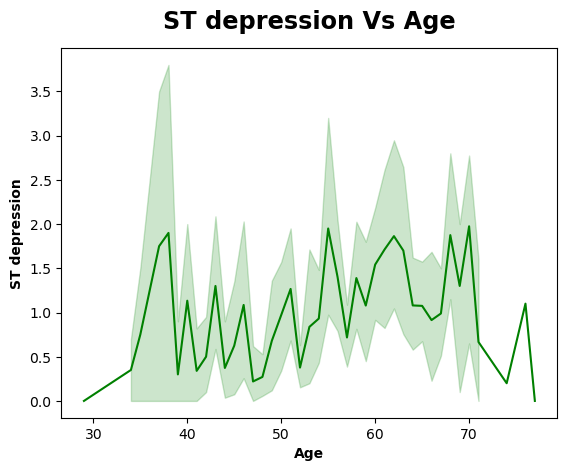

In [64]:
# lineplot on ST depression Vs Age
Presence=sns.lineplot(data=df ,x='age',y='oldpeak',color='g')
Presence.set_xlabel('Age',fontweight='bold')
Presence.set_ylabel('ST depression',fontweight='bold')
Presence.set_title('ST depression Vs Age',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

We can see that ST depression is increase suddenly at the age of 30-40.
An ST depression can be an outcome of an electrocardiogram (ECG) test. It can indicate health conditions like hypokalemia, myocardial ischemia, or a side effect of medications

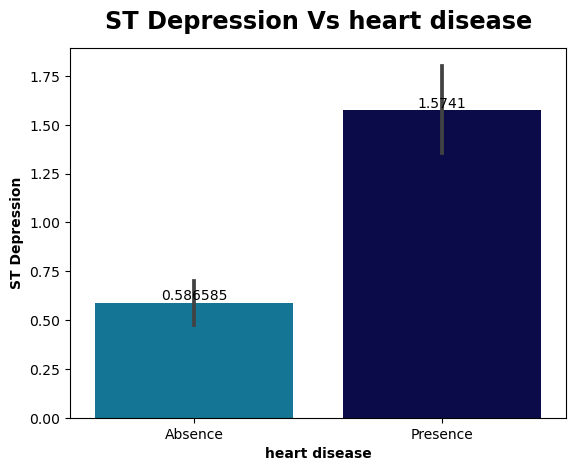

In [65]:
# barplot on ST Depression Vs heart disease 
Presence=sns.barplot(data=df ,x='heart_disease',y='oldpeak',palette='ocean_r')
Presence.set_xlabel('heart disease',fontweight='bold')
Presence.set_ylabel('ST Depression',fontweight='bold')
Presence.set_title('ST Depression Vs heart disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

The ST Depression is highly present in heart disease .

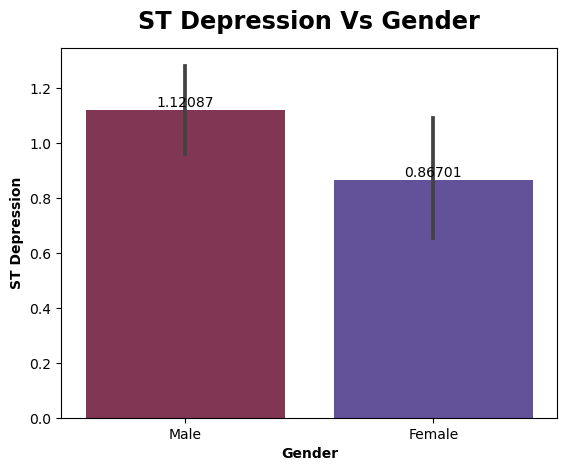

In [66]:
# barplot on ST Depression Vs gender
Presence=sns.barplot(data=df ,x='Gender',y='oldpeak',palette='twilight_r')
Presence.set_xlabel('Gender',fontweight='bold')
Presence.set_ylabel('ST Depression',fontweight='bold')
Presence.set_title('ST Depression Vs Gender',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

The ST depression is more in male .

In [67]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
0  0    6    0       Absence    Male   typical angina                True   
1  3    3    1      Presence    Male     asymptomatic               False   
2  2    7    1      Presence    Male     asymptomatic               False   
3  0    3    0       Absence    Male      non-anginal               False   
4  0    3    0       Absence  Female  atypical angina               False   

            Thal_mai angina  
0       fixed defect     no  
1             normal    yes  
2  reversible defect    yes  
3             normal     no  
4             normal     no

In [68]:
def ST_segment(row):
    if row==1:
        return 'upsloping'
    if row==2:
        return 'flat'
    elif row==3:
        return 'downsloping'

In [69]:
df['ST_segment']=df['slope'].apply(ST_segment)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   1       145   233    1        2      150      0      2.3  ...   
1   67    1   4       160   286    0        2      108      1      1.5  ...   
2   67    1   4       120   229    0        2      129      1      2.6  ...   
3   37    1   3       130   250    0        0      187      0      3.5  ...   
4   41    0   2       130   204    0        2      172      0      1.4  ...   

   ca thal num  heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
0   0    6   0        Absence    Male   typical angina                True   
1   3    3   1       Presence    Male     asymptomatic               False   
2   2    7   1       Presence    Male     asymptomatic               False   
3   0    3   0        Absence    Male      non-anginal               False   
4   0    3   0        Absence  Female  atypical angina               False   

            Thal_mai angina   ST_segment  
0       fixed defect     no  downsloping  
1             normal    yes         flat  
2  reversible defect    yes         flat  
3             normal     no  downsloping  
4             normal     no    upsloping  

[5 rows x 21 columns]

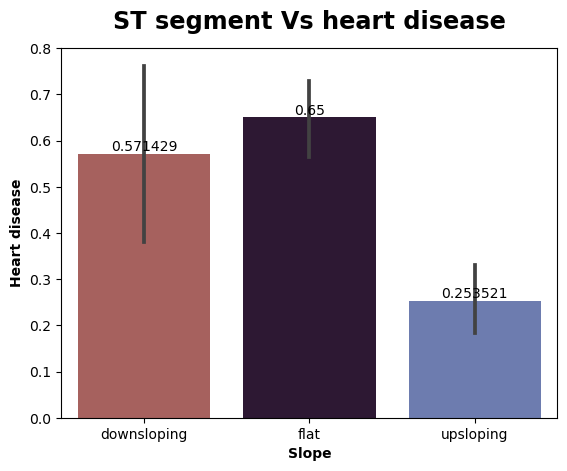

In [70]:
# barplot on ST segment Vs heart disease 
Presence=sns.barplot(data=df ,x='ST_segment',y='num',palette='twilight_r')
Presence.set_xlabel('Slope',fontweight='bold')
Presence.set_ylabel('Heart disease',fontweight='bold')
Presence.set_title('ST segment Vs heart disease',fontweight='heavy',size='xx-large',y=1.03)
Presence.bar_label(Presence.containers[0])
plt.show()

We see that in ST segment Flat excerice is highly visible throught out heart disease 
The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope),
has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD).

In [71]:
#Converting numercial value into categorical
def age_category(row):
    if row>=29 and row<40:
        return 'Young age'
    elif row>=40 and row<55:
        return 'Middle age'
    elif row>55:
        return 'Elder age'
    

In [72]:
df['age_category']=df['age'].apply(age_category)
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
298   45    1   1       110   264    0        0      132      0      1.2  ...   
299   68    1   4       144   193    1        0      141      0      3.4  ...   
300   57    1   4       130   131    0        0      115      1      1.2  ...   
301   57    0   2       130   236    0        2      174      0      0.0  ...   
302   38    1   3       138   175    0        0      173      0      0.0  ...   

     thal num heart_disease  Gender       Chest_Pain Fasting_blood_sugar  \
298     7   1      Presence    Male   typical angina               False   
299     7   1      Presence    Male     asymptomatic                True   
300     7   1      Presence    Male     asymptomatic               False   
301     3   1      Presence  Female  atypical angina               False   
302     3   0       Absence    Male      non-anginal               False   

              Thal_mai angina ST_segment age_category  
298  reversible defect     no       flat   Middle age  
299  reversible defect     no       flat    Elder age  
300  reversible defect    yes       flat    Elder age  
301             normal     no       flat    Elder age  
302             normal     no  upsloping    Young age  

[5 rows x 22 columns]

In [73]:
df.isnull().sum()

age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
num                    0
heart_disease          0
Gender                 0
Chest_Pain             0
Fasting_blood_sugar    0
Thal_mai               0
angina                 0
ST_segment             0
age_category           8
dtype: int64

In [74]:
#filing null value with the mode
df['age_category'].fillna(df['age_category'].mode()[0],inplace=True)

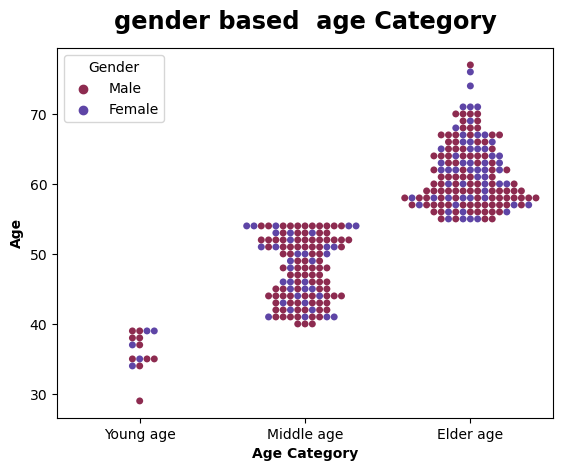

In [75]:
#Swarm plot creation of gender based  age Category
Presence=sns.swarmplot(data=df ,x='age_category',y='age',hue='Gender',palette='twilight_r',order=['Young age','Middle age','Elder age'])
Presence.set_xlabel('Age Category',fontweight='bold')
Presence.set_ylabel('Age',fontweight='bold')
Presence.set_title('gender based  age Category',fontweight='heavy',size='xx-large',y=1.03)
plt.show()

In our population we found that maximum male are from middle age and  most of the female are Elder age

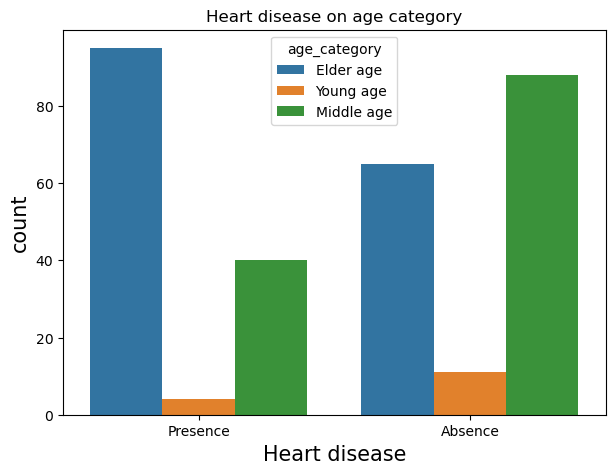

In [76]:
# Count plot Based on chest pain in gender
plt.figure(figsize=(7,5))
hue_order=['Young age','Middle age','Elder age']
sns.countplot(x=df['heart_disease'],hue='age_category',data=df,order=['Presence','Absence'])
plt.xlabel('Heart disease',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Heart disease on age category')
plt.show()

The most of the heart disease present in the elder age and the middle age people are moslty free from thhe Heart disease .